### รหัส : 6304101318
### ชื่อ-นามสกุล : ฉัตรมงคล ในนามมหมัด
### กลุ่ม : 2

In [ ]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 642 kB 38.1 MB/s 
     |████████████████████████████████| 87 kB 8.1 MB/s 
     |████████████████████████████████| 128 kB 65.9 MB/s 
     |████████████████████████████████| 1.1 MB 59.9 MB/s 
     |████████████████████████████████| 3.4 MB 60.2 MB/s 
     |████████████████████████████████| 238 kB 72.3 MB/s 
     |████████████████████████████████| 78 kB 8.7 MB/s 
     |████████████████████████████████| 840 kB 60.7 MB/s 
     |████████████████████████████████| 1.2 MB 52.4 MB/s 
     |████████████████████████████████| 596 kB 54.5 MB/s 
     |████████████████████████████████| 10.9 MB 51.4 MB/s 
     |████████████████████████████████| 55.3 MB 6.2 MB/s 
     |████████████████████████████████| 25.3 MB 81.9 MB/s 
     |████████████████████████████████| 352 kB 65.2 MB/s 
     |████████████████████████████████| 99 kB 11.3 MB/s 
     |████████████████████████████████| 40 kB 7.4 MB/s 
     |████████████████████████████████| 77 kB 6.1 MB/s 
     |███████████████

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path = '/content/drive/MyDrive/SignLanguageDataset/SignLanguage_in_Office'
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 990, num_label: 11, labels: .ipynb_checkpoints, vid1, vid10, vid2, vid3, vid4, vid5, vid6, vid7, vid8, vid9.


In [ ]:
%cd '/content/drive/MyDrive/SignLanguage'

/content/drive/MyDrive/SignLanguage


In [ ]:
!ls -la

total 4
drwx------ 2 root root 4096 Jul 29 08:04 goodbye


In [ ]:
!rm -rf .ipynb_checkpoints

In [ ]:
!ls -la

total 4
drwx------ 2 root root 4096 Jul 29 08:04 goodbye


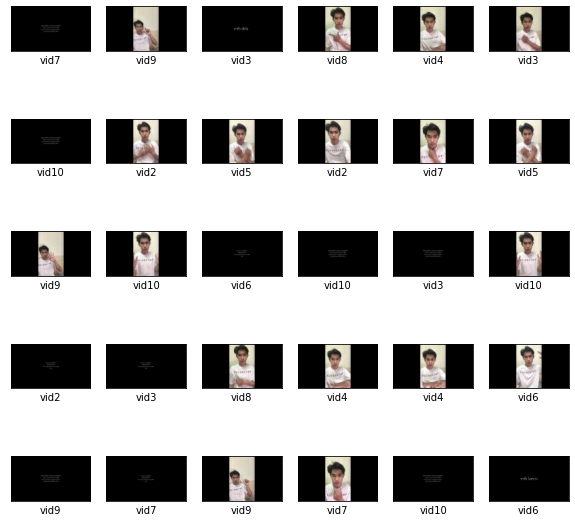

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(30)):
  plt.subplot(5,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

In [ ]:
inception_v3_spec = image_classifier.ModelSpec(
    uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
inception_v3_spec.input_image_shape = [299, 299]

In [ ]:
model = image_classifier.create(train_data, model_spec=inception_v3_spec, validation_data=validation_data, epochs=100)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 2048)             21802784  
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 11)                22539     
                                                                 
Total params: 21,825,323
Trainable params: 22,539
Non-trainable params: 21,802,784
_________________________________________________________________
None
Epoch 1/100
24/24 [==============================] - 294s 12s/step - loss: 2.2018 - accuracy: 0.2539 - val_loss: 1.6194 - val_accuracy: 0.6465
Epoch 2/100
24/24 [=============================

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 2048)             21802784  
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 11)                22539     
                                                                 
Total params: 21,825,323
Trainable params: 22,539
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
loss, accuracy = model.evaluate(test_data)
print(f"loss:={loss}, accuracy:={accuracy}")

4/4 [==============================] - 35s 7s/step - loss: 0.8833 - accuracy: 0.8485
loss:=0.8833359479904175, accuracy:=0.8484848737716675


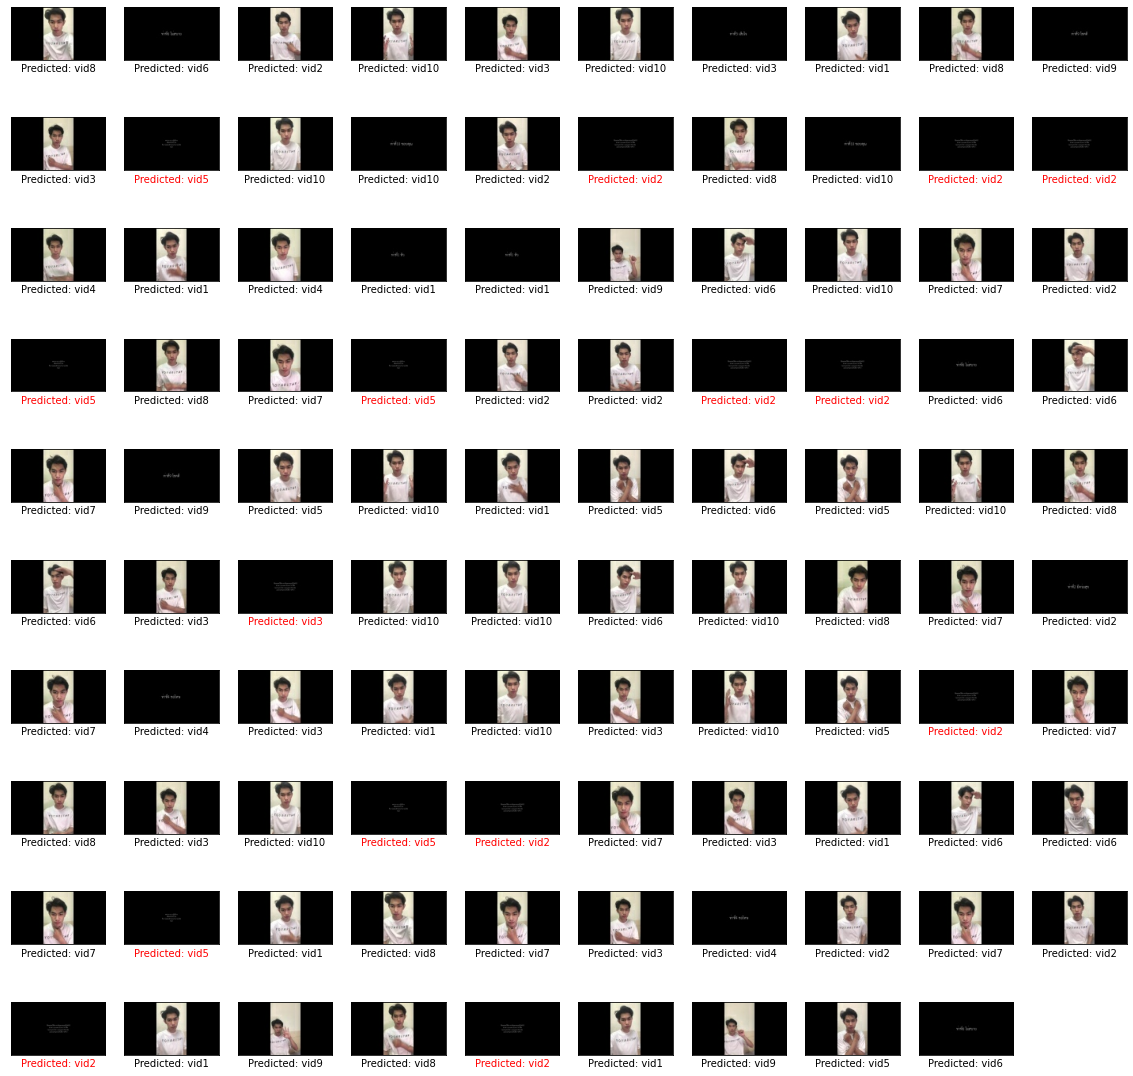

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='/content/drive/MyDrive/SignLanguage/goodbye')

INFO:tensorflow:Assets written to: /tmp/tmp7_2yrm_7/assets


INFO:tensorflow:Assets written to: /tmp/tmp7_2yrm_7/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpkaqgitbc/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpkaqgitbc/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/SignLanguage/goodbye/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/SignLanguage/goodbye/model.tflite


In [ ]:
model.export(export_dir='/content/drive/MyDrive/SignLanguage/goodbye', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in /content/drive/MyDrive/SignLanguage/goodbye/labels.txt


INFO:tensorflow:Saving labels in /content/drive/MyDrive/SignLanguage/goodbye/labels.txt


In [ ]:
model.export(export_dir='/content/drive/MyDrive/SignLanguage/goodbye', export_format=ExportFormat.SAVED_MODEL)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SignLanguage/goodbye/saved_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/SignLanguage/goodbye/saved_model/assets
